# pandas十分钟入门（codedog翻译）

In [1]:
# 按照国际规范导入数据科学包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 创建数据结构对象

### 创建Series数据
作为pandas的基础数据结构之一【series,DataFrame,Index】。Series是带有索引的一系列数据

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])  # 我们没有指定索引，所以采用默认索引[0,1,2……]
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

我们来为s加上一个自定的索引

In [3]:
s = pd.Series([1,3,5,np.nan,6,8], index=list('abcdef'))
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [4]:
s[0], s['a']

(1.0, 1.0)

这里揭示了一个原则：<br>
不自定义索引的情况下，使用默认索引。<br>
默认的索引是\[0, 1, 2, ……\]， 并且在具有自定义的索引时也可以使用，默认索引是一直有效的。<br>
我们可以根据自己的需求，定义索引的名称，让数据更形象。

![image](https://raw.githubusercontent.com/codebysandwich/picrepos/master/pics/SeriesIndex.png)

### 创建DataFrame数据帧

通过时间索引，自定义标签列名，和numpy的array数据来实现创建数据帧（DataFrame）

In [5]:
# 创建时间index
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
# 指定index, columns
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.720061,-0.700161,-0.343805,0.391079
2013-01-02,-0.549141,0.031889,-0.873999,-0.057267
2013-01-03,0.563412,-0.604205,-0.090018,1.396778
2013-01-04,-1.536731,-1.107295,2.247573,0.794179
2013-01-05,-1.865662,-1.672457,0.293234,0.369450
2013-01-06,-0.576997,-0.608267,-1.022988,0.141955


通过字典或json数据创建数据帧

In [7]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


对于初学者来说，官方的这个例子用到了广播原则，稍微高阶了些。

对于数据帧类型数据来说，也是有dtypes属性的。描述的是每列数据的数据类型

In [8]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 数据视图

### 观察数据的头部和尾部

In [9]:
df.head()

,A,B,C,D
2013-01-01,0.720061,-0.700161,-0.343805,0.391079
2013-01-02,-0.549141,0.031889,-0.873999,-0.057267
2013-01-03,0.563412,-0.604205,-0.090018,1.396778
2013-01-04,-1.536731,-1.107295,2.247573,0.794179
2013-01-05,-1.865662,-1.672457,0.293234,0.369450


In [10]:
df.tail()

,A,B,C,D
2013-01-02,-0.549141,0.031889,-0.873999,-0.057267
2013-01-03,0.563412,-0.604205,-0.090018,1.396778
2013-01-04,-1.536731,-1.107295,2.247573,0.794179
2013-01-05,-1.865662,-1.672457,0.293234,0.369450
2013-01-06,-0.576997,-0.608267,-1.022988,0.141955


### 查看数据帧的三大部分
【索引，列名，数据】:

In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns  # 这也是基础数据类型Index之一

Index(['A', 'B', 'C', 'D'], dtype='object')

In [13]:
df.values

array([[ 0.72006056, -0.70016117, -0.34380473,  0.39107925],
       [-0.54914148,  0.03188885, -0.87399921, -0.05726654],
       [ 0.56341234, -0.60420467, -0.09001849,  1.39677848],
       [-1.53673139, -1.10729454,  2.24757298,  0.79417922],
       [-1.86566219, -1.67245722,  0.29323417,  0.36945044],
       [-0.5769972 , -0.6082671 , -1.02298791,  0.14195486]])

### 简单统计
数据分析人员喜欢的简单的数据统计：

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.540843,-0.776749,0.034999,0.506029
std,1.054284,0.570872,1.188857,0.521188
min,-1.865662,-1.672457,-1.022988,-0.057267
25%,-1.296798,-1.005511,-0.741451,0.198829
50%,-0.563069,-0.654214,-0.216912,0.380265
75%,0.285274,-0.605220,0.197421,0.693404
max,0.720061,0.031889,2.247573,1.396778


### 转置数据：

In [15]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.720061,-0.549141,0.563412,-1.536731,-1.865662,-0.576997
B,-0.700161,0.031889,-0.604205,-1.107295,-1.672457,-0.608267
C,-0.343805,-0.873999,-0.090018,2.247573,0.293234,-1.022988
D,0.391079,-0.057267,1.396778,0.794179,0.369450,0.141955


### 排序

依据索引排序：

In [16]:
df.sort_index(axis=1, ascending=False)  # 按照列的index排序，非上升模式(倒序)

,D,C,B,A
2013-01-01,0.391079,-0.343805,-0.700161,0.720061
2013-01-02,-0.057267,-0.873999,0.031889,-0.549141
2013-01-03,1.396778,-0.090018,-0.604205,0.563412
2013-01-04,0.794179,2.247573,-1.107295,-1.536731
2013-01-05,0.369450,0.293234,-1.672457,-1.865662
2013-01-06,0.141955,-1.022988,-0.608267,-0.576997


依据数值排序:

In [17]:
df.sort_values(by='B') #依据B列的数值倒序，正序排序

,A,B,C,D
2013-01-05,-1.865662,-1.672457,0.293234,0.369450
2013-01-04,-1.536731,-1.107295,2.247573,0.794179
2013-01-01,0.720061,-0.700161,-0.343805,0.391079
2013-01-06,-0.576997,-0.608267,-1.022988,0.141955
2013-01-03,0.563412,-0.604205,-0.090018,1.396778
2013-01-02,-0.549141,0.031889,-0.873999,-0.057267


## 索引和切片

### 获取某列数据

In [18]:
df['A'] # 等效于 df.A

2013-01-01    0.720061
2013-01-02   -0.549141
2013-01-03    0.563412
2013-01-04   -1.536731
2013-01-05   -1.865662
2013-01-06   -0.576997
Freq: D, Name: A, dtype: float64

多个列：

In [19]:
df[['A', 'B', 'C']]

,A,B,C
2013-01-01,0.720061,-0.700161,-0.343805
2013-01-02,-0.549141,0.031889,-0.873999
2013-01-03,0.563412,-0.604205,-0.090018
2013-01-04,-1.536731,-1.107295,2.247573
2013-01-05,-1.865662,-1.672457,0.293234
2013-01-06,-0.576997,-0.608267,-1.022988


### 获取行数据

In [20]:
df[0:3]

,A,B,C,D
2013-01-01,0.720061,-0.700161,-0.343805,0.391079
2013-01-02,-0.549141,0.031889,-0.873999,-0.057267
2013-01-03,0.563412,-0.604205,-0.090018,1.396778


In [21]:
df['2013-01-01':'2013-01-03']

,A,B,C,D
2013-01-01,0.720061,-0.700161,-0.343805,0.391079
2013-01-02,-0.549141,0.031889,-0.873999,-0.057267
2013-01-03,0.563412,-0.604205,-0.090018,1.396778


### 通过loc(自定义的标签索引)

In [22]:
df.loc[dates[0]]

A    0.720061
B   -0.700161
C   -0.343805
D    0.391079
Name: 2013-01-01 00:00:00, dtype: float64

loc下的复合索引：

In [23]:
df.loc[:, ['A', 'C']]

,A,C
2013-01-01,0.720061,-0.343805
2013-01-02,-0.549141,-0.873999
2013-01-03,0.563412,-0.090018
2013-01-04,-1.536731,2.247573
2013-01-05,-1.865662,0.293234
2013-01-06,-0.576997,-1.022988


利用标签名切片（区别默认索引切片，是包含endpoint的），花哨索引：

In [24]:
df.loc['2013-01-02':'2013-01-04', ['A', 'C']]

,A,C
2013-01-02,-0.549141,-0.873999
2013-01-03,0.563412,-0.090018
2013-01-04,-1.536731,2.247573


loc定位一个元素等效于at：

In [25]:
df.loc[dates[0], 'A'], df.at[dates[0], 'A']

(0.7200605646248385, 0.7200605646248385)

## iloc 位置索引
不是通过标签（自定义的名称）,而是通过自定义索引也就是绝对的位置来索引和切片：

In [26]:
df.iloc[3] # 第三行，[3, :]后面可以缺省

A   -1.536731
B   -1.107295
C    2.247573
D    0.794179
Name: 2013-01-04 00:00:00, dtype: float64

In [27]:
df.iloc[3:5, 0:2] # 绝对位置endpoint是不取的区别于标签切片

,A,B
2013-01-04,-1.536731,-1.107295
2013-01-05,-1.865662,-1.672457


In [28]:
df.iloc[1:3] # 等效于df.iloc[1:3, :] 和 df[1:3]

,A,B,C,D
2013-01-02,-0.549141,0.031889,-0.873999,-0.057267
2013-01-03,0.563412,-0.604205,-0.090018,1.396778


In [29]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.700161,-0.343805
2013-01-02,0.031889,-0.873999
2013-01-03,-0.604205,-0.090018
2013-01-04,-1.107295,2.247573
2013-01-05,-1.672457,0.293234
2013-01-06,-0.608267,-1.022988


iloc和iat作用在定位一个元素时：

In [30]:
df.iloc[1, 1], df.iat[1, 1]

(0.031888854418549606, 0.031888854418549606)

## 布尔索引 

In [31]:
df[df.A>0] # A列大于0的所有行  -- df[df>0, :]

,A,B,C,D
2013-01-01,0.720061,-0.700161,-0.343805,0.391079
2013-01-03,0.563412,-0.604205,-0.090018,1.396778


In [32]:
df[df>0] # df大于0的所有值

,A,B,C,D
2013-01-01,0.720061,NaN,NaN,0.391079
2013-01-02,NaN,0.031889,NaN,NaN
2013-01-03,0.563412,NaN,NaN,1.396778
2013-01-04,NaN,NaN,2.247573,0.794179
2013-01-05,NaN,NaN,0.293234,0.369450
2013-01-06,NaN,NaN,NaN,0.141955


isin()来过滤数据：

In [33]:
# 创建数据的副本
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.720061,-0.700161,-0.343805,0.391079,one
2013-01-02,-0.549141,0.031889,-0.873999,-0.057267,one
2013-01-03,0.563412,-0.604205,-0.090018,1.396778,two
2013-01-04,-1.536731,-1.107295,2.247573,0.794179,three
2013-01-05,-1.865662,-1.672457,0.293234,0.369450,four
2013-01-06,-0.576997,-0.608267,-1.022988,0.141955,three


In [34]:
df2[df2['E'].isin(['one', 'two'])]

,A,B,C,D,E
2013-01-01,0.720061,-0.700161,-0.343805,0.391079,one
2013-01-02,-0.549141,0.031889,-0.873999,-0.057267,one
2013-01-03,0.563412,-0.604205,-0.090018,1.396778,two


ps: 我们拆解下步骤：
+ 得到df\['E'\].isin()的作用结果
+ 索引的方式

In [35]:
idx = df2['E'].isin(['one', 'two'])
idx

2013-01-01     True
2013-01-02     True
2013-01-03     True
2013-01-04    False
2013-01-05    False
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [36]:
df2.loc[idx, :] # 等效df2[idx]

,A,B,C,D,E
2013-01-01,0.720061,-0.700161,-0.343805,0.391079,one
2013-01-02,-0.549141,0.031889,-0.873999,-0.057267,one
2013-01-03,0.563412,-0.604205,-0.090018,1.396778,two


可以看出索引的原则和方式是比较多的，基础部分我们需要了解运行的规则，唯手熟尔。
___

## 修改数据

设定index来创建一列数据：

In [37]:
S1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('2013-01-02', periods=6))
S1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df['F'] = S1  # 依据是index 所以出现NAN和2013-01-07的数据舍弃
df.at[dates[0], 'A'] = 0  # 等效loc
df.iat[0, 1] = 0    # 等效于iloc
df.loc[:, 'D'] = np.array([5] * len(dates)) 
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.343805,5,NaN
2013-01-02,-0.549141,0.031889,-0.873999,5,1.0
2013-01-03,0.563412,-0.604205,-0.090018,5,2.0
2013-01-04,-1.536731,-1.107295,2.247573,5,3.0
2013-01-05,-1.865662,-1.672457,0.293234,5,4.0
2013-01-06,-0.576997,-0.608267,-1.022988,5,5.0


通过where的方式实现数据修改：

In [39]:
df2 = df.copy() # 创建副本， 对df不会产生修改的风险
df2[df > 0] = -df # 所有的正数转化为负数
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.343805,-5,NaN
2013-01-02,-0.549141,-0.031889,-0.873999,-5,-1.0
2013-01-03,-0.563412,-0.604205,-0.090018,-5,-2.0
2013-01-04,-1.536731,-1.107295,-2.247573,-5,-3.0
2013-01-05,-1.865662,-1.672457,-0.293234,-5,-4.0
2013-01-06,-0.576997,-0.608267,-1.022988,-5,-5.0


## 缺失值的处理

In [40]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.343805,5,NaN,1.0
2013-01-02,-0.549141,0.031889,-0.873999,5,1.0,1.0
2013-01-03,0.563412,-0.604205,-0.090018,5,2.0,NaN
2013-01-04,-1.536731,-1.107295,2.247573,5,3.0,NaN


### 舍弃nan

In [41]:
df1.dropna(how='any') # 等效于dropna(), dropna(axis=0)

,A,B,C,D,F,E
2013-01-02,-0.549141,0.031889,-0.873999,5,1.0,1.0


In [42]:
df1.dropna(axis=1)

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.343805,5
2013-01-02,-0.549141,0.031889,-0.873999,5
2013-01-03,0.563412,-0.604205,-0.090018,5
2013-01-04,-1.536731,-1.107295,2.247573,5


### 填充缺失值

In [43]:
df1.fillna(value=5)  # 用5填充所有的缺失值

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.343805,5,5.0,1.0
2013-01-02,-0.549141,0.031889,-0.873999,5,1.0,1.0
2013-01-03,0.563412,-0.604205,-0.090018,5,2.0,5.0
2013-01-04,-1.536731,-1.107295,2.247573,5,3.0,5.0


### 标记空值

In [44]:
df1.isna()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 数值函数操作

In [45]:
df.mean()

A   -0.660853
B   -0.660056
C    0.034999
D    5.000000
F    3.000000
dtype: float64

指定维度的均值：

In [46]:
df.mean(axis=1)

2013-01-01    1.164049
2013-01-02    0.921750
2013-01-03    1.373838
2013-01-04    1.520709
2013-01-05    1.151023
2013-01-06    1.558350
Freq: D, dtype: float64

### 重要的apply函数

In [47]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.343805,5,NaN
2013-01-02,-0.549141,0.031889,-1.217804,10,1.0
2013-01-03,0.014271,-0.572316,-1.307822,15,3.0
2013-01-04,-1.522461,-1.679610,0.939751,20,6.0
2013-01-05,-3.388123,-3.352068,1.232985,25,10.0
2013-01-06,-3.965120,-3.960335,0.209997,30,15.0


In [48]:
df.apply(lambda x: x.max()-x.min()) # 每一列的最大值减去最小值的结果，产生与一行维度相同的结果

A    2.429075
B    1.704346
C    3.270561
D    0.000000
F    4.000000
dtype: float64

## Series的统计

In [49]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    3
2    5
3    1
4    3
5    3
6    0
7    1
8    2
9    2
dtype: int32

In [50]:
s.value_counts()

3    3
5    2
2    2
1    2
0    1
dtype: int64

## 字符串方法

In [51]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 数据合并

### concat()方法

In [52]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.280758,-1.199537,0.784073,-1.380775
1,-0.281260,1.872975,0.616237,-0.377803
2,-0.732044,-1.543945,0.266343,-0.296770
3,1.214078,0.318639,0.631054,-1.038380
4,-0.458065,-0.515452,0.537531,-0.393696
5,-0.477149,0.928113,0.648049,-0.925008
6,-0.065101,0.077325,-0.848875,-2.348666
7,0.763054,0.488816,-0.055587,-0.125350
8,0.198077,-1.712520,-0.549877,-2.156818
9,-0.446296,-0.590265,0.202051,1.741591


In [53]:
pieces = [df[:3], df[3:6], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.280758,-1.199537,0.784073,-1.380775
1,-0.281260,1.872975,0.616237,-0.377803
2,-0.732044,-1.543945,0.266343,-0.296770
3,1.214078,0.318639,0.631054,-1.038380
4,-0.458065,-0.515452,0.537531,-0.393696
5,-0.477149,0.928113,0.648049,-0.925008
7,0.763054,0.488816,-0.055587,-0.125350
8,0.198077,-1.712520,-0.549877,-2.156818
9,-0.446296,-0.590265,0.202051,1.741591


concat()方法是pandas的函数，聚合DataDrame对象。<br>
此外我们可以使用DataFrame的append()方法添加DataFrame数据帧。

### merge()

In [54]:
# 创建数据
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left
right

,key,lval
0,foo,1
1,foo,2


,key,rval
0,foo,4
1,foo,5


In [55]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


对比下面这个例子再理解下：<font color='red'>注意key的值</font>

In [56]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left
right

,key,lval
0,foo,1
1,bar,2


,key,rval
0,foo,4
1,bar,5


In [57]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### append()

上面提到的DataFrame的append方法：<font color='red'>可以添加series和DataFrame对象</font>

In [58]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
s = df.iloc[3]
df
s

,A,B,C,D
0,0.350508,-0.974971,1.229958,-0.630177
1,-1.415161,0.420469,0.970493,-2.429216
2,0.000353,-0.993228,-2.215618,0.662239
3,1.566912,1.650780,1.792411,-0.034604
4,-0.044444,-0.148123,1.283859,-0.173703
5,-0.118232,1.940342,-0.940145,-0.426562
6,-2.142299,-0.245254,-2.452360,-0.552845
7,0.206487,-0.179123,0.096047,-0.579815


A    1.566912
B    1.650780
C    1.792411
D   -0.034604
Name: 3, dtype: float64

In [59]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.350508,-0.974971,1.229958,-0.630177
1,-1.415161,0.420469,0.970493,-2.429216
2,0.000353,-0.993228,-2.215618,0.662239
3,1.566912,1.650780,1.792411,-0.034604
4,-0.044444,-0.148123,1.283859,-0.173703
5,-0.118232,1.940342,-0.940145,-0.426562
6,-2.142299,-0.245254,-2.452360,-0.552845
7,0.206487,-0.179123,0.096047,-0.579815
8,1.566912,1.650780,1.792411,-0.034604


In [60]:
df.append(df[:3])  # 没有ignore_index, 同时append(dataframe对象)

,A,B,C,D
0,0.350508,-0.974971,1.229958,-0.630177
1,-1.415161,0.420469,0.970493,-2.429216
2,0.000353,-0.993228,-2.215618,0.662239
3,1.566912,1.650780,1.792411,-0.034604
4,-0.044444,-0.148123,1.283859,-0.173703
5,-0.118232,1.940342,-0.940145,-0.426562
6,-2.142299,-0.245254,-2.452360,-0.552845
7,0.206487,-0.179123,0.096047,-0.579815
0,0.350508,-0.974971,1.229958,-0.630177
1,-1.415161,0.420469,0.970493,-2.429216


## 分组（Group）

分组（group by）一般包含以下几个步骤：
+ 分割（spliting）按照规则将数据分割成几个组
+ 应用计算（applying）比如将每个分组的结果求平均
+ 合并（Combining） 将应用计算的结果合并成数据帧

In [61]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.138233,-0.312776
1,bar,one,0.603979,-0.103392
2,foo,two,-0.717505,1.086018
3,bar,three,-0.461249,-0.463721
4,foo,two,-0.231784,0.147618
5,bar,two,1.518878,-1.073686
6,foo,one,0.515656,-0.066072
7,foo,three,1.020982,0.788205


In [62]:
df.groupby(by='A').sum()  # 按照A分组，分组的数据应用求和聚合成最后的结果

,C,D
A,,
bar,1.661607,-1.640799
foo,0.449116,1.642993


### 按照复合条件分组

In [63]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.603979 -0.103392
    three -0.461249 -0.463721
    two    1.518878 -1.073686
foo one    0.377422 -0.378848
    three  1.020982  0.788205
    two   -0.949289  1.233636

## 数据变形

### stack()
将数据由dataframe聚合成Series,不过索引变成了更高级的MultiIndex。<br>
与之反作用的unstack()函数

In [64]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
tuples
index

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [65]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     1.395918 -0.029664
      two    -0.006214 -1.063167
baz   one     0.636165  0.368449
      two     1.249276 -0.043578
foo   one     0.617757 -0.521037
      two    -1.884405  0.464799
qux   one     2.062459  0.558954
      two     1.893233 -1.897503

In [66]:
df.stack()
type(df.stack())

first  second   
bar    one     A    1.395918
               B   -0.029664
       two     A   -0.006214
               B   -1.063167
baz    one     A    0.636165
               B    0.368449
       two     A    1.249276
               B   -0.043578
foo    one     A    0.617757
               B   -0.521037
       two     A   -1.884405
               B    0.464799
qux    one     A    2.062459
               B    0.558954
       two     A    1.893233
               B   -1.897503
dtype: float64

pandas.core.series.Series

In [67]:
stacked = df.stack()
stacked.unstack()

A         B
first second                    
bar   one     1.395918 -0.029664
      two    -0.006214 -1.063167
baz   one     0.636165  0.368449
      two     1.249276 -0.043578
foo   one     0.617757 -0.521037
      two    -1.884405  0.464799
qux   one     2.062459  0.558954
      two     1.893233 -1.897503

### pivot_table() 重构数据表

In [68]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.922598,-0.724567
1,one,B,foo,0.603740,-1.652858
2,two,C,foo,2.149054,-0.878988
3,three,A,bar,-0.892780,1.625009
4,one,B,bar,0.955708,-0.976694
5,one,C,bar,-0.671557,0.113609
6,two,A,foo,1.451321,-0.439198
7,three,B,foo,0.607928,0.679792
8,one,C,foo,-1.689725,-0.277201
9,one,A,bar,-1.575737,0.335317


In [69]:
df.pivot_table(values='D', index=['A', 'B'], columns='C') # 自己观察下数据的对应关系

C             bar       foo
A     B                    
one   A -1.575737  1.922598
      B  0.955708  0.603740
      C -0.671557 -1.689725
three A -0.892780       NaN
      B       NaN  0.607928
      C -0.671863       NaN
two   A       NaN  1.451321
      B  0.920013       NaN
      C       NaN  2.149054

## 时间Series

### pd.date_range() 生成时间序列

In [70]:
rng = pd.date_range('1/1/2012', periods=100, freq='S') # 周期为秒，100个时间数据
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng) # 创建时间对应的数据
ts.resample('5S').sum()

2012-01-01 00:00:00    1164
2012-01-01 00:00:05    1594
2012-01-01 00:00:10    1148
2012-01-01 00:00:15    1544
2012-01-01 00:00:20    1134
2012-01-01 00:00:25    1793
2012-01-01 00:00:30    1213
2012-01-01 00:00:35    1430
2012-01-01 00:00:40    1469
2012-01-01 00:00:45    1379
2012-01-01 00:00:50    1607
2012-01-01 00:00:55     928
2012-01-01 00:01:00    1416
2012-01-01 00:01:05    1572
2012-01-01 00:01:10    1567
2012-01-01 00:01:15     673
2012-01-01 00:01:20    1504
2012-01-01 00:01:25    1440
2012-01-01 00:01:30    1273
2012-01-01 00:01:35     972
Freq: 5S, dtype: int32

<font color='red'>打开了分钟转小时数据的新大门</font>

### 时区转换

In [71]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.638629
2012-03-07    0.352242
2012-03-08   -1.785182
2012-03-09   -1.084060
2012-03-10    0.465619
Freq: D, dtype: float64

In [72]:
ts_utc = ts.tz_localize('UTC')
ts_utc
ts_utc.tz_convert('US/Eastern')

2012-03-06 00:00:00+00:00   -0.638629
2012-03-07 00:00:00+00:00    0.352242
2012-03-08 00:00:00+00:00   -1.785182
2012-03-09 00:00:00+00:00   -1.084060
2012-03-10 00:00:00+00:00    0.465619
Freq: D, dtype: float64

2012-03-05 19:00:00-05:00   -0.638629
2012-03-06 19:00:00-05:00    0.352242
2012-03-07 19:00:00-05:00   -1.785182
2012-03-08 19:00:00-05:00   -1.084060
2012-03-09 19:00:00-05:00    0.465619
Freq: D, dtype: float64

### 时间跨度转换 

注意时间的变化

In [73]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    2.576606
2012-02-29    0.779973
2012-03-31   -0.809303
2012-04-30    2.338702
2012-05-31   -0.741012
Freq: M, dtype: float64

In [74]:
ps = ts.to_period()
ps

2012-01    2.576606
2012-02    0.779973
2012-03   -0.809303
2012-04    2.338702
2012-05   -0.741012
Freq: M, dtype: float64

In [75]:
ps.to_timestamp()

2012-01-01    2.576606
2012-02-01    0.779973
2012-03-01   -0.809303
2012-04-01    2.338702
2012-05-01   -0.741012
Freq: MS, dtype: float64

## 数据标签（Categoricals）

In [76]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df['grade'] = df['raw_grade'].astype("category")
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

<font color='orange'>分为三个不同等级abe</font>

In [77]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.set_categories(["very bad", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very bad, good, very good]

这样可以让raw_grade 和 grade对应上， 且让数据更有现实意义。此时【Categories (3, object): \[very bad, good, very good\]】让数据有了顺序的意义：

In [78]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [79]:
df['map'] = df['raw_grade'].map({'a':'very good', 'b':'good', 'e':'very bad'})
df.sort_values(by='map')

,id,raw_grade,grade,map
1,2,b,good,good
2,3,b,good,good
5,6,e,very bad,very bad
0,1,a,very good,very good
3,4,a,very good,very good
4,5,a,very good,very good


map可以对应转化，字面上有了意义，但是在没有标签优先级的特性，排序时就失去优势了。

## 绘图 

虽然画图数matplotlib的主要功能，但是numpy和pandas都是集成绘图的接口的，我们还是可以使用pandas做简单的绘图：

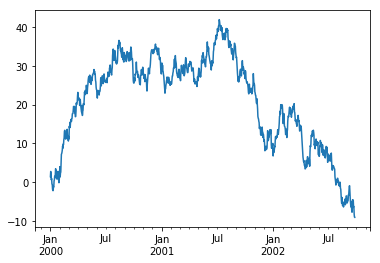

In [80]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

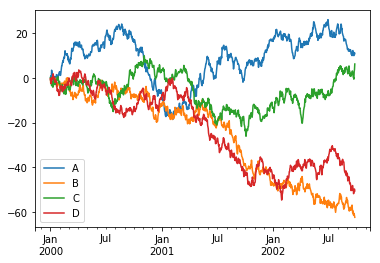

In [81]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']) 

df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc='best')

## 导入导出数据

pd.read_csv()<br>
pd.read_excel()

df.to_csv()<br>
df.to_excel()

读取数据，和保存数据大家可以从官网上学习，并自己尝试使用几次。读取指定行和列还有数据sheet……多尝试，多练手。